In today's lecture, we're going to explore campaign contributions and another related dataset to try and explore the 2016 presidential election.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import datetime as dt
import matplotlib.dates as mdates
import folium

The FEC maintains a public record of all campaign donations, and anyone can go and download it. Navigate to http://classic.fec.gov/disclosurep/PDownload.do and download ALL.zip. Unzip it and rename it to 2016-donations.csv for convenience.

The file is a csv, so we can use pandas to load it into a dataframe

In [3]:
df = pd.read_csv('2016-donations.csv', index_col=False)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (6,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We can get a quick overview look at the data with the head() function

In [4]:
df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016
1,C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016
2,C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016
3,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016
4,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,100.0,08-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1074981,P2016


The shape attribute tells us how many rows x how many columns of the dataframe

In [5]:
df.shape

(7440252, 18)

The describe() method provides us some useful statistics on the numerical data in the dataframe

In [6]:
df.describe()

,contb_receipt_amt,file_num
count,7.440252e+06,7.440252e+06
mean,1.261310e+02,1.101464e+06
std,7.623128e+03,2.975025e+04
min,-9.330800e+04,1.003942e+06
25%,1.500000e+01,1.077916e+06
50%,2.800000e+01,1.098663e+06
75%,9.435000e+01,1.133832e+06
max,1.277771e+07,1.146285e+06


The columns attribute gives us all the column names in the dataframe. These names can be used as attributes to index into

In [7]:
df.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'],
      dtype='object')

Here, we index into a specific column (the contribution amount column) and call head() to see the first few values

In [8]:
df.contb_receipt_amt.head()

0    175.0
1     25.0
2    100.0
3    200.0
4    100.0
Name: contb_receipt_amt, dtype: float64

Now, we don't most of the dataset that we loaded. We only care about a few fields, such as contribution date, contribution amount, candidate name, etc. We can use the following command to pick just a few columns out and store them in a new dataframe.

In [9]:
contributions = df[['cand_nm', 'contb_receipt_dt', 'contb_receipt_amt', 'contbr_nm', 'election_tp']]
contributions

,cand_nm,contb_receipt_dt,contb_receipt_amt,contbr_nm,election_tp
0,"Rubio, Marco",15-MAR-16,175.00,"BLUM, MAUREEN",P2016
1,"Rubio, Marco",16-MAR-16,25.00,"DODSON, MARK B. MR.",P2016
2,"Rubio, Marco",20-FEB-16,100.00,"CHILDERS, WILLIAM",P2016
3,"Rubio, Marco",10-MAR-16,200.00,"RUCINSKI, ROBERT",P2016
4,"Rubio, Marco",08-MAR-16,100.00,"RUCINSKI, ROBERT",P2016
5,"Rubio, Marco",07-MAR-16,100.00,"MARQUEZ, PANFILO",P2016
6,"Rubio, Marco",26-JUN-15,500.00,"DOHERTY, THERESA",P2016
7,"Rubio, Marco",06-FEB-16,100.00,"CHILDERS, WILLIAM",P2016
8,"Rubio, Marco",18-MAR-16,388.25,"RECKER, ANGELA",P2016
9,"Rubio, Marco",29-OCT-15,225.00,"HEFFERNAN, MICHAEL",P2016


In the above example, we can see that many of the rows have NaN in them, so some data is missing (in the election_tp column especially). We can use pd.isnull() function to see how many missing values we have in that column

In [10]:
sum(pd.isnull(contributions.election_tp))

14022

Let's just go ahead and drop those corrupted rows with the dropna() function and save the result to a new dataframe

In [11]:
clean_contributions = contributions.dropna()
clean_contributions.shape

(7426230, 5)

We can verify that the number of dropped rows is the number of null rows calculated above

In [12]:
contributions.shape[0] - clean_contributions.shape[0]

14022

Now let's get a quick view at our clean dataset

In [13]:
clean_contributions.head()

,cand_nm,contb_receipt_dt,contb_receipt_amt,contbr_nm,election_tp
0,"Rubio, Marco",15-MAR-16,175.0,"BLUM, MAUREEN",P2016
1,"Rubio, Marco",16-MAR-16,25.0,"DODSON, MARK B. MR.",P2016
2,"Rubio, Marco",20-FEB-16,100.0,"CHILDERS, WILLIAM",P2016
3,"Rubio, Marco",10-MAR-16,200.0,"RUCINSKI, ROBERT",P2016
4,"Rubio, Marco",08-MAR-16,100.0,"RUCINSKI, ROBERT",P2016


Suppose we wanted to know all the candidates who received funding? We can use the unique() method call on a particular column to get all unique values present

In [14]:
clean_contributions.cand_nm.unique()

array(['Rubio, Marco', 'Santorum, Richard J.', 'Perry, James R. (Rick)',
       'Carson, Benjamin S.', "Cruz, Rafael Edward 'Ted'", 'Paul, Rand',
       'Clinton, Hillary Rodham', 'Sanders, Bernard', 'Fiorina, Carly',
       'Huckabee, Mike', 'Pataki, George E.', "O'Malley, Martin Joseph",
       'Graham, Lindsey O.', 'Bush, Jeb', 'Trump, Donald J.',
       'Jindal, Bobby', 'Christie, Christopher J.', 'Walker, Scott',
       'Stein, Jill', 'Webb, James Henry Jr.', 'Kasich, John R.',
       'Gilmore, James S III', 'Lessig, Lawrence', 'Johnson, Gary',
       'McMullin, Evan'], dtype=object)

Let's pull out just Donald Trumps contributions

In [15]:
trump_conts = clean_contributions[clean_contributions.cand_nm == 'Trump, Donald J.']

Take a quick look to verify our code is correct

In [16]:
trump_conts.head()

,cand_nm,contb_receipt_dt,contb_receipt_amt,contbr_nm,election_tp
6588686,"Trump, Donald J.",08-MAY-16,100.00,"ECKERSALL, LAWRENCE",P2016
6588687,"Trump, Donald J.",10-MAR-16,48.75,"VANBEUGE, ROBERT",P2016
6588688,"Trump, Donald J.",03-MAR-16,300.00,"VANBEUGE, ROBERT",P2016
6588689,"Trump, Donald J.",11-JUL-16,28.00,"VANBEUGE, ROBERT",P2016
6588690,"Trump, Donald J.",25-NOV-16,100.25,"BLAKESLEE, TODD",G2016


One thing said during the elections was that Trump and Hillary take donations from the very rich, while Bernie made use of much smaller contributions from those who weren't as wealthy. Let's use the describe() function to verify if this is true.

In [17]:
trump_conts.describe()

,contb_receipt_amt
count,771259.000000
mean,155.834139
std,372.764083
min,-17705.000000
25%,28.000000
50%,60.000000
75%,160.000000
max,86936.800000


As you can see, trump's average contribution was $156. Let's now look at Bernie

In [18]:
bernie_conts = clean_contributions[clean_contributions.cand_nm == 'Sanders, Bernard']
bernie_conts.describe()

,contb_receipt_amt
count,2.063094e+06
mean,4.470614e+01
std,1.420453e+02
min,-9.330800e+04
25%,1.350000e+01
50%,2.700000e+01
75%,5.000000e+01
max,1.000000e+04


Bernie's average was only $45! That's quite the difference, and certainly speaks to the truth of the above claim. Let's now look at hillary's

In [19]:
hillary_conts = clean_contributions[clean_contributions.cand_nm == 'Clinton, Hillary Rodham']
hillary_conts.describe()

,contb_receipt_amt
count,3.506056e+06
mean,1.301792e+02
std,4.777289e+03
min,-2.000000e+04
25%,1.500000e+01
50%,2.500000e+01
75%,1.000000e+02
max,4.904861e+06


The average for hillary is $130! This is more in line with trump, and wayy more than Bernie. We will now explore and directly compare Hillary's and Trump's contributions, looking for any insight that may help us understand the presidential election better. One step we will take for the purposes of just this lecture is to get rid of all the smaller contributions since otherwise processing/graphing the dataset would take too much time. Removing the smaller contributions greatly reduces the time and still maintains the overall shapes of the graphs. 

In [20]:
hillary_conts_short = hillary_conts[abs(hillary_conts.contb_receipt_amt) > 100]
trump_conts_short = trump_conts[abs(trump_conts.contb_receipt_amt) > 100]

Now, we want to be able to graph the donations for each candidate over time. To do this, we need to return a list of sorted x and y pairs of the date and the contributions for that date. Let's define the following method to take in a dataframe and return exactly that

In [21]:
def to_donation_xy_points(contributions):
    donations_dict = defaultdict(lambda:0)
    for index, row in contributions.iterrows():
        date = dt.datetime.strptime(row.contb_receipt_dt, '%d-%b-%y')
        donations_dict[date] += row.contb_receipt_amt
    sorted_by_date = sorted(donations_dict.items())
    return zip(*sorted_by_date)

Let's call the method on hillary's dataset, and plot the result

In [22]:
hill_x, hill_y = to_donation_xy_points(hillary_conts_short)

One important thing to remember about matplotlib is that all functions are called through the global plt. The workflow goes like this: create a figure -> draw your plots -> show all the figures. So first issue a call to figure(). This will create a canvas. Then call plot() to plot any data on the canvas. If you call plot() multiple times after creating a figure, those multiple plots will be drawn on that figure. If you want to plot on separate canvasas, issue another call to figure() afterwards and call plot() after that to plot on that canvas. At the end of filling your canvases with plots, call the show() function to show all your graphs.

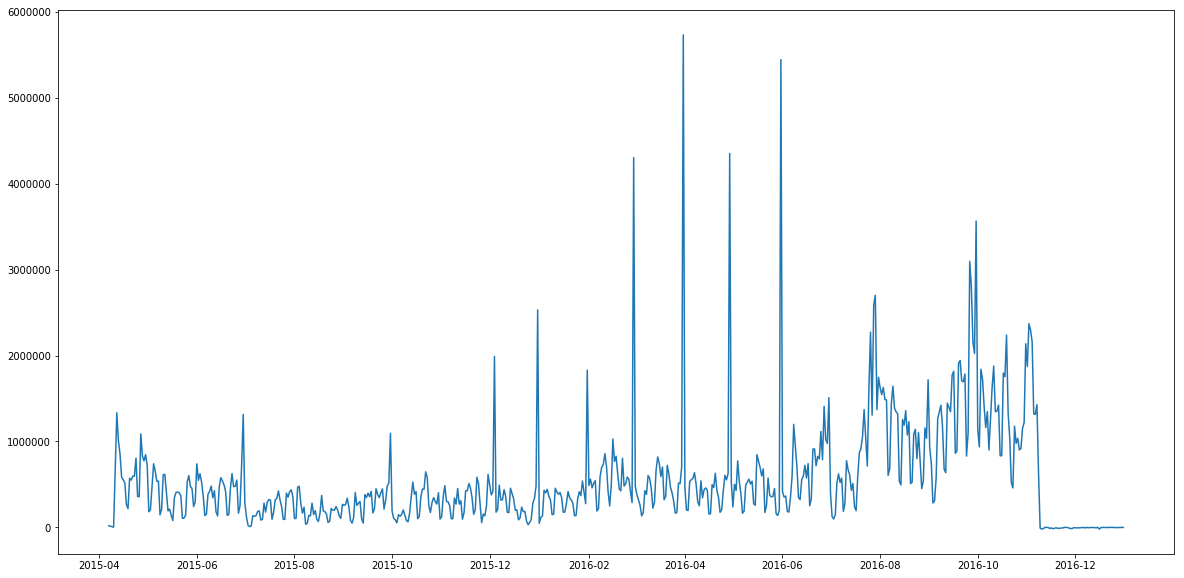

In [23]:
plt.figure(figsize=(20,10))
plt.plot(hill_x, hill_y)
plt.show()

We've just plotted all of Hillary's contributions over time! We see a few big mysterious spikes at certain times. Let's explore this more by sorting the contributions and taking a peek at what those contributions are.

In [24]:
hillary_conts_short.sort_values('contb_receipt_amt', ascending=False).head()

,cand_nm,contb_receipt_dt,contb_receipt_amt,contbr_nm,election_tp
3284270,"Clinton, Hillary Rodham",31-MAR-16,4904860.51,HILLARY VICTORY FUND - UNITEMIZED,P2016
3379521,"Clinton, Hillary Rodham",31-MAY-16,4575438.56,HILLARY VICTORY FUND - UNITEMIZED,P2016
3364742,"Clinton, Hillary Rodham",29-FEB-16,3686373.26,HILLARY VICTORY FUND - UNITEMIZED,P2016
3369437,"Clinton, Hillary Rodham",29-APR-16,3600489.08,HILLARY VICTORY FUND - UNITEMIZED,P2016
3329073,"Clinton, Hillary Rodham",31-DEC-15,1797624.94,HILLARY VICTORY FUND - UNITEMIZED,P2016


Hmmm.... if we look up "HILLARY VICTORY FUND" on Google, we find that it's Hillary's fundraising aggregation committee. So, the committee is aggregating funds and donating them all to clinton on one date. Let's remove this committee to get a smoother and more accurate overview of contributions over time.

In [25]:
hillary_conts_real = hillary_conts_short[hillary_conts_short.contbr_nm != 'HILLARY VICTORY FUND - UNITEMIZED']

In [26]:
hill_x2, hill_y2 = to_donation_xy_points(hillary_conts_real)

Now let's plot these new points.

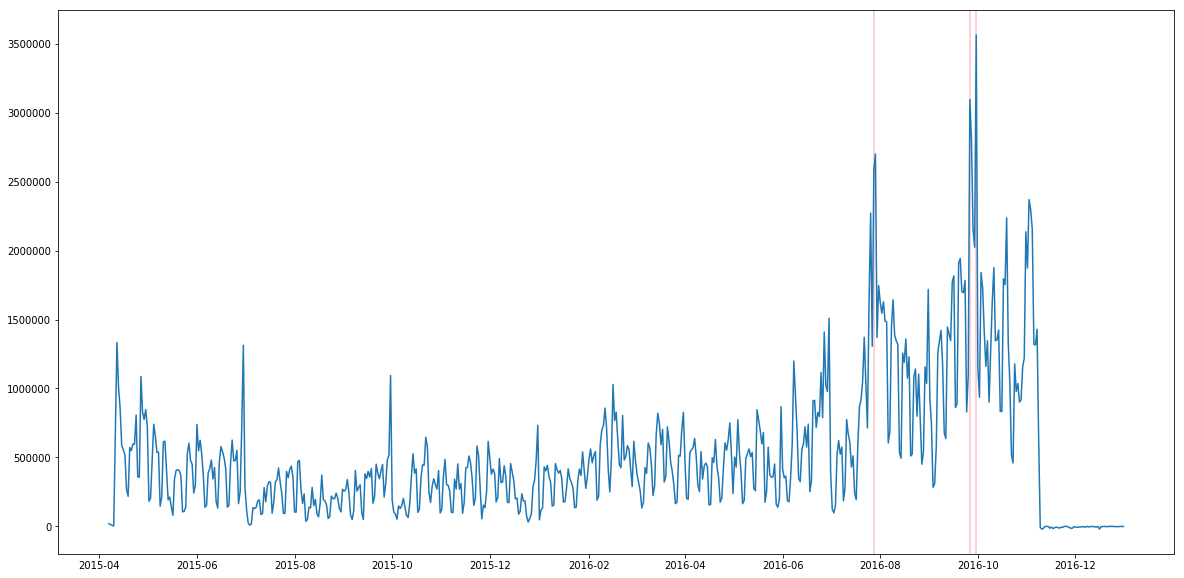

In [27]:
plt.figure(figsize=(20,10))
plt.axvline(x=dt.datetime(2016,7,28), c='pink') # clinton dnc speech
plt.axvline(x=dt.datetime(2016,9,26), c='pink') # 1st presidential debate
plt.axvline(x=dt.datetime(2016,9,30), c='pink') # polls show hillary ahead after 1st debate

plt.plot(hill_x2, hill_y2)
plt.show()

We can see a few peaks in contributions here. I wonder what caused these? Let's insert some vertical lines at the dates. We find with some quick google searches that the first spike was clinton's dnc speech, the second was the first presidential debate, and the third was the first poll results of the debate. We just tied parts of our graph to real-world occurrences! How cool

In [28]:
trump_x, trump_y = to_donation_xy_points(trump_conts_short)

Now let's do the same for trump and plot both of their contributions

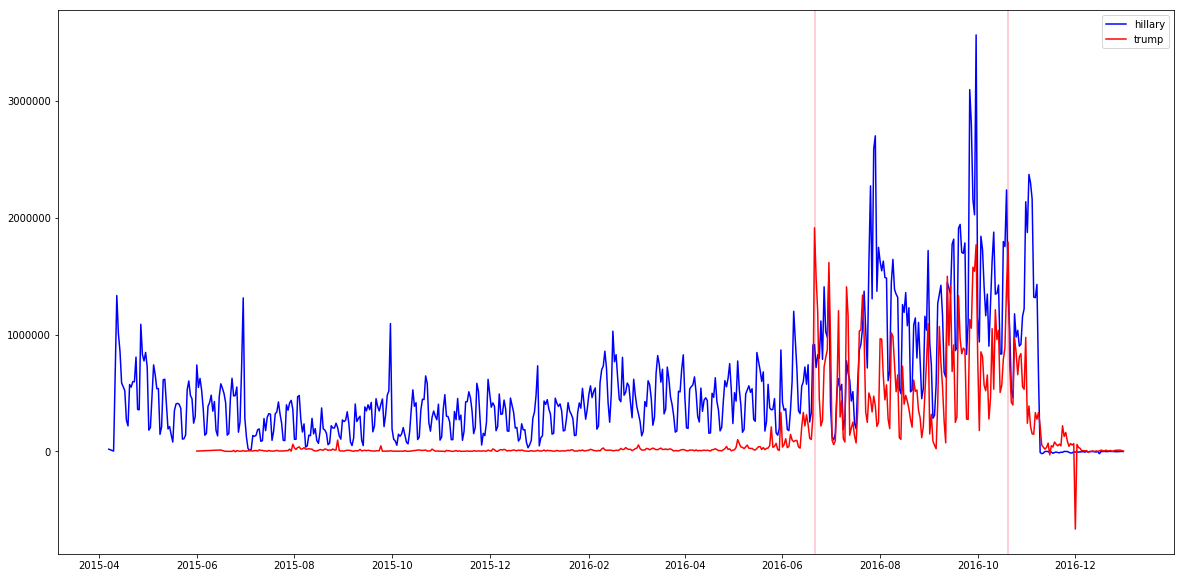

In [29]:
plt.figure(figsize=(20,10))
plt.axvline(x=dt.datetime(2016,6,21), c='pink') # trump speech at rnc
plt.axvline(x=dt.datetime(2016,10,20), c='pink') # presidential debate

plt.plot(hill_x2, hill_y2, label='hillary', c='blue')
plt.plot(trump_x, trump_y, label='trump', c='red')
plt.legend()
plt.show()

One thing we immediately see is that hillary has a more continuous, steady source of contributions, while Trump's seem to spike up a few months before the election. This probably has most to do with how trump lead his campaign and how really many didn't take him seriously until the end. Also, the major spikes from trump's contributions happen at his RNC speech and at the last presidential debate, which is he rumored to have widely won. 

To try and understand trump further, we can pivot to a new dataset that has a lot to do with his identity - his tweets. Navigate to http://www.trumptwitterarchive.com/archive and copy the full csv and save it into trump-tweets.csv

In [30]:
tweets = pd.read_csv('trump-tweets.csv')

Let's look at what our data looks like

In [31]:
tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet
0,Twitter for Android,So I raised/gave $5600000 for the veterans and...,06-01-2016 13:17:58,9381,29810,False
1,Twitter for iPhone,Join me in San Jose California- tomorrow eveni...,06-01-2016 20:46:38,3245,9350,False
2,Twitter for Android,Crooked Hillary Clinton is a fraud who has put...,06-01-2016 22:16:36,9816,27248,False
3,Twitter for iPhone,"Same failing @nytimes ""reporter"" who wrote dis...",06-02-2016 00:21:01,4026,13160,False
4,Twitter for iPhone,Thank you Sacramento California! #MakeAmericaG...,06-02-2016 04:58:34,5147,16491,False


A few quick searches will reveal that both Trump and his staff tweet from the same account. But, Trump tweets from Android, while his staff tweets from iPhone. We can exploit this to look at differences in the tweets

In [32]:
android = tweets[tweets.source.str.contains('Android')]
iphone = tweets[tweets.source.str.contains('iPhone')]

Hahaha... we can see how many times trump tweeted above hillary vs his staff.

In [33]:
sum(android.text.str.contains('Hillary'))

161

We can create a barplot for the relative frequency of various search terms. Let's try some famous ones, like SAD, CROOKED, and JOBS!!!!! WE NEED MORE JOBS!!!!!

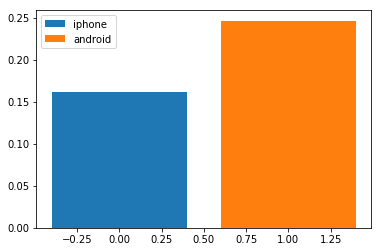

In [34]:
search_string = '(?i)hillary' # crooked, sad, lies, jobs business
plt.bar(0, sum(iphone.text.str.contains(search_string)) / len(iphone), label='iphone')
plt.bar(1, sum(android.text.str.contains(search_string)) / len(android), label='android')
plt.legend()
plt.show()

Another interesting metric is the type of media contained in tweets. If a tweet includes a picture, link, or some other reference,  it will have http in it. Generally, tweets with embeds are much more carefully formatted

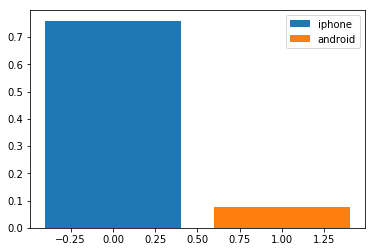

In [35]:
plt.bar(0, sum(iphone.text.str.contains('http')) / len(iphone), label='iphone')
plt.bar(1, sum(android.text.str.contains('http')) / len(android), label='android')
plt.legend()
plt.show()

As we can see, it's pretty obvious Trump prefers to just tweet plain text - he likes to blurb whatever he is thinking at that moment.

Let's remove the time from each date to plot these tweets

In [36]:
tweets.created_at = tweets.created_at.astype(str).apply(lambda x: x[:10])

Now we want to plot his tweets vs his campaign donations and see if there is any correlation. This function here is similar to the one defined before and converts his tweets into something plottable.

In [37]:
def for_trump_tweets(dataframe, field):
    tweets_dict = defaultdict(lambda:0)
    for index, row in dataframe.iterrows():
        date = dt.datetime.strptime(row.created_at, '%m-%d-%Y')
        tweets_dict[date] += row[field]
    sorted_by_date = sorted(tweets_dict.items())
    return zip(*sorted_by_date)

Let's plot both the favorite count and retweet count

In [38]:
tweet_x, tweet_y = for_trump_tweets(tweets, 'favorite_count')
tweet_x2, tweet_y2 = for_trump_tweets(tweets, 'retweet_count')

Using the matplotlib functions we used before, we can plot all of the data together! We can also change the scatter plot dot size to be in line with how popular the tweet is. This can give us an interesting chart

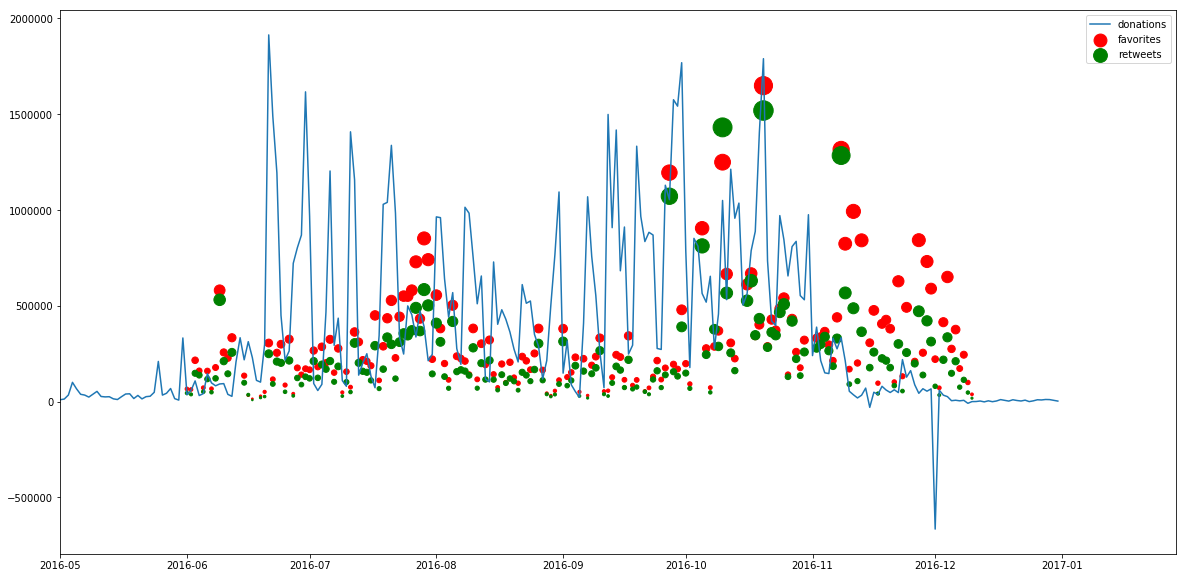

In [39]:
plt.figure(figsize=(20,10))
plt.scatter(tweet_x, tweet_y, s=np.asarray(tweet_y) / 5000, label='favorites', c='red')
plt.scatter(tweet_x2, np.asarray(tweet_y2) * 2, s=np.asarray(tweet_y2) / 2000, label='retweets', c='green')
plt.plot(trump_x, trump_y, label='donations')
plt.xlim(left=dt.datetime(2016,5,1))
plt.legend()
plt.show()

As you can see, there is a strong correlation between the favorite and retweet count, but not one between the tweets themselves and the campaign donations. That's okay! Sometimes our hypotheses don't work out.

In [42]:
state_conts = defaultdict(lambda:0)
for index, row in df.iterrows():
    state_conts[row.contbr_st] += row.contb_receipt_amt

We can also aggregate all the donations by state. The above code snippet does just that. We can now use folium to create a choropleth map of all donations by state. Don't worry about doing this yourself, its fairly advanced and took me some time to make it; I'm just providing it for visual purposes.

In [43]:
state_data = pd.DataFrame.from_dict(state_conts, orient='index').reset_index().rename(columns={'index':'state',0:'amount'})

In [44]:
map = folium.Map(location=[40, -100], zoom_start=4)
map.choropleth(geo_path='us-states.json', 
             data=state_data,
             columns=['state', 'amount'],
             key_on='feature.id',
             fill_color='YlGnBu')
map

California and New York have the most donations!

I hope you liked this lecture, and learned something about using intuition and data to prove/disprove hypotheses you may have. I hope this was a fun example and a good introduction to data science!! :) 